# Dynamic Pricing Optimization for E-commerce
## Project Overview
This project aims to optimize the prices of products in an e-commerce store by using dynamic pricing strategies. The prices will be adjusted based on factors like demand, competitor prices, and customer behavior in real-time.

We will use machine learning models to predict the optimal price to maximize profit and market share.


###  Simulated Dataset Creation

In [7]:
import pandas as pd
import numpy as np

# Simulating an e-commerce dataset
np.random.seed(42)

n_products = 1000

data = pd.DataFrame({
    'Product_ID': np.arange(1, n_products + 1),
    'Price': np.random.uniform(10, 100, n_products),
    'Competitor_Price': np.random.uniform(10, 100, n_products),
    'Sales_Volume': np.random.randint(1, 1000, n_products),
    'Customer_Interest': np.random.randint(10, 1000, n_products),
    'Seasonality': np.random.choice(['Low', 'Medium', 'High'], n_products),
    'Inventory_Level': np.random.randint(1, 500, n_products)
})

data.to_csv('ecommerce_data.csv', index=False)

# Load the dataset
data = pd.read_csv('ecommerce_data.csv')
data.head()

Product_ID      Price  Competitor_Price  Sales_Volume  Customer_Interest  \
0           1  43.708611         26.661964           220                489   
1           2  95.564288         58.771085           903                 31   
2           3  75.879455         88.565125           163                358   
3           4  63.879264         75.900240           951                735   
4           5  24.041678         82.590503           220                692   

  Seasonality  Inventory_Level  
0        High              139  
1        High              344  
2      Medium              305  
3         Low              149  
4         Low              115

### Exploratory Data Analysis (EDA)


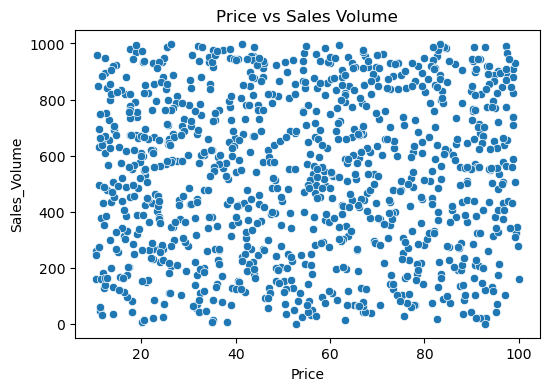

C:\Users\areeb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\areeb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


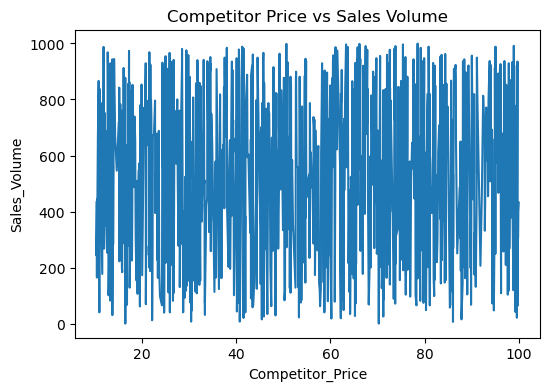

C:\Users\areeb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


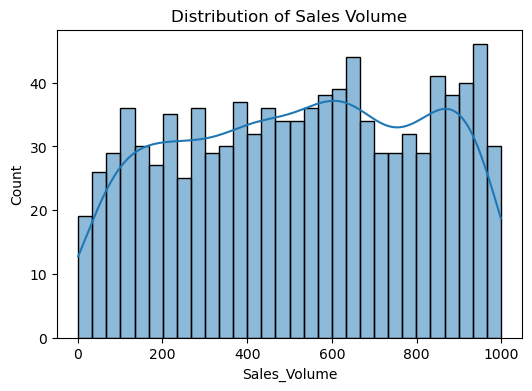

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price vs Sales Volume
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Price', y='Sales_Volume', data=data)
plt.title('Price vs Sales Volume')
plt.show()

# Competitor Price vs Sales Volume
plt.figure(figsize=(6, 4))
sns.lineplot(x='Competitor_Price', y='Sales_Volume', data=data)
plt.title('Competitor Price vs Sales Volume')
plt.show()

# Sales Volume distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Sales_Volume'], bins=30, kde=True)
plt.title('Distribution of Sales Volume')
plt.show()

In [14]:
data.describe()

Product_ID        Price  Competitor_Price  Sales_Volume  \
count  1000.000000  1000.000000       1000.000000   1000.000000   
mean    500.500000    54.123090         55.631557    526.506000   
std     288.819436    26.292363         26.297090    282.269932   
min       1.000000    10.416882         10.289644      1.000000   
25%     250.750000    31.237594         31.696684    283.750000   
50%     500.500000    54.712664         56.686052    543.000000   
75%     750.250000    76.988763         78.441855    772.000000   
max    1000.000000    99.974591         99.947235    999.000000   

       Customer_Interest  Inventory_Level  
count        1000.000000      1000.000000  
mean          501.439000       256.927000  
std           285.648317       142.320388  
min            10.000000         2.000000  
25%           250.750000       138.750000  
50%           511.000000       261.500000  
75%           739.000000       379.250000  
max           999.000000       499.000000

### Feature Engineering
Now we will create new features to improve our model.

**Lag Features:** These capture historical data<br>
**Rolling Averages:** These smooth out fluctuations.<br>
**Dummy Variables:** Convert categorical variables like Seasonality.

In [18]:
# Lag features
data['Sales_Lag1'] = data['Sales_Volume'].shift(1).fillna(0)

# Rolling average
data['Sales_Rolling_3'] = data['Sales_Volume'].rolling(window=3).mean().fillna(data['Sales_Volume'])

# Convert Seasonality to dummy variables
data = pd.get_dummies(data, columns=['Seasonality'], drop_first=True)

data.head()

Product_ID      Price  Competitor_Price  Sales_Volume  Customer_Interest  \
0           1  43.708611         26.661964           220                489   
1           2  95.564288         58.771085           903                 31   
2           3  75.879455         88.565125           163                358   
3           4  63.879264         75.900240           951                735   
4           5  24.041678         82.590503           220                692   

   Inventory_Level  Sales_Lag1  Sales_Rolling_3  Seasonality_Low  \
0              139         0.0       220.000000            False   
1              344       220.0       903.000000            False   
2              305       903.0       428.666667            False   
3              149       163.0       672.333333             True   
4              115       951.0       444.666667             True   

   Seasonality_Medium  
0               False  
1               False  
2                True  
3               False  
4               False

### Model Selection
In this section, we will implement three different models to predict **Linear Regression** , **Random Forest** and **Neural Network**
#### Split Data.

In [34]:
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['Price', 'Competitor_Price', 'Customer_Interest', 'Inventory_Level', 'Sales_Lag1', 'Sales_Rolling_3', 'Seasonality_Medium', 'Seasonality_Low']]
y = data['Sales_Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MSE: 41949.03589870946


#### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 42998.9696545


#### Neural Network

In [43]:
from keras.models import Sequential
from keras.layers import Dense

# Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

# Compile the model
nn_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network MSE: {mse_nn}")

C:\Users\areeb\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Neural Network MSE: 46511.708555301375


### Optimization Strategies
#### Profit Maximization

In [50]:
import numpy as np
from scipy.optimize import minimize

# Let's assume the cost of production is 70% of the price
data['Cost'] = data['Price'] * 0.7

# Calculate Profit
data['Profit'] = (data['Price'] - data['Cost']) * data['Sales_Volume']

# Define a function to calculate profit for a given price
def profit_function(price, sales_volume):
    cost = price * 0.7
    profit = (price - cost) * sales_volume
    return -profit  # Return negative to maximize with 'minimize' function

# Optimizing profit for each product
optimal_prices = []
for i in range(len(data)):
    sales_volume = data.loc[i, 'Sales_Volume']
    
    # Initial price guess
    initial_price = data.loc[i, 'Price']
    
    # Using SciPy's minimize to find the optimal price
    result = minimize(profit_function, initial_price, args=(sales_volume), bounds=[(10, 100)])
    
    # Store the optimal price
    optimal_prices.append(result.x[0])

# Add the optimized prices back to the DataFrame
data['Optimal_Price'] = optimal_prices

# Calculate the new optimized profits
data['Optimal_Profit'] = (data['Optimal_Price'] - (data['Optimal_Price'] * 0.7)) * data['Sales_Volume']

# Show the first few rows of the DataFrame to verify
data[['Product_ID', 'Price', 'Optimal_Price', 'Profit', 'Optimal_Profit']].head()

Product_ID      Price  Optimal_Price        Profit  Optimal_Profit
0           1  43.708611          100.0   2884.768306          6600.0
1           2  95.564288          100.0  25888.365505         27090.0
2           3  75.879455          100.0   3710.505338          4890.0
3           4  63.879264          100.0  18224.753899         28530.0
4           5  24.041678          100.0   1586.750724          6600.0

### Model Evaluation

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate models using R2 and MSE

# Linear Regression Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression R²: {r2_lr}")
print(f"Linear Regression MSE: {mse_lr}")

# Random Forest Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf}")
print(f"Random Forest MSE: {mse_rf}")

# Neural Network Evaluation
r2_nn = r2_score(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network R²: {r2_nn}")
print(f"Neural Network MSE: {mse_nn}")

Linear Regression R²: 0.5239456213042712
Linear Regression MSE: 41949.03589870946
Random Forest R²: 0.5120305545792236
Random Forest MSE: 42998.9696545
Neural Network R²: 0.4721665934865503
Neural Network MSE: 46511.708555301375


#### Visualize the results.

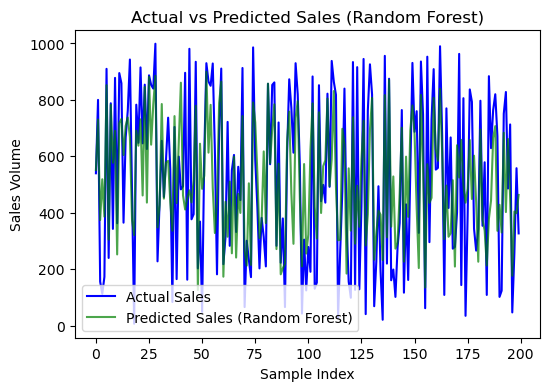

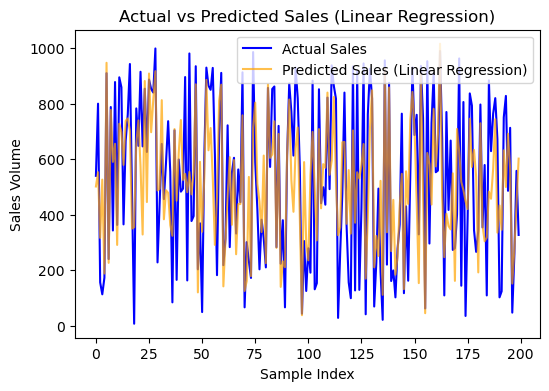

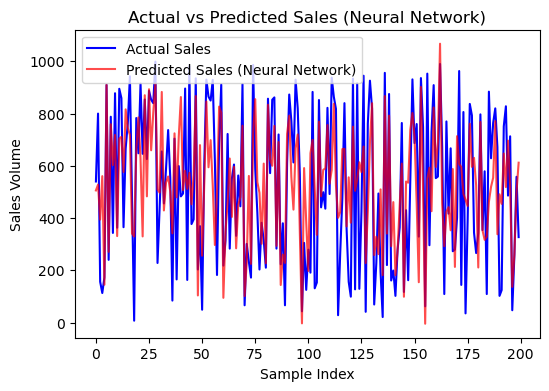

In [65]:
# Visualize the results: Plot actual vs predicted sales volume for Random Forest
plt.figure(figsize=(6, 4))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred_rf, label='Predicted Sales (Random Forest)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

# Visualize the results: Plot actual vs predicted sales volume for Linear Regression
plt.figure(figsize=(6, 4))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred_lr, label='Predicted Sales (Linear Regression)', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

# Visualize the results: Plot actual vs predicted sales volume for Neural Network
plt.figure(figsize=(6, 4))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred_nn, label='Predicted Sales (Neural Network)', color='red', alpha=0.7)
plt.title('Actual vs Predicted Sales (Neural Network)')
plt.xlabel('Sample Index')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

### Deployment

In [ ]:
%run app.py